In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 160

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
np.random.seed(43)

## 1D random walk

In [3]:
def update_mu(mu_t, var_t, e, var_x, var_e):
    return (((var_t + var_x) * e + var_e * mu_t) / 
            (var_t + var_x + var_e))

In [4]:
def update_var(var_t, var_x, var_e):
    return (((var_t + var_x) * var_e) / (var_t + var_x + var_e))

In [5]:
mu_0 = 0
var_0 = 1
var_x = 2.0
var_e = 1.0
e_1 = 2.5

In [6]:
mu_1 = update_mu(mu_0, var_0, e_1, var_x, var_e)
var_1 = update_var(var_0, var_x, var_e)

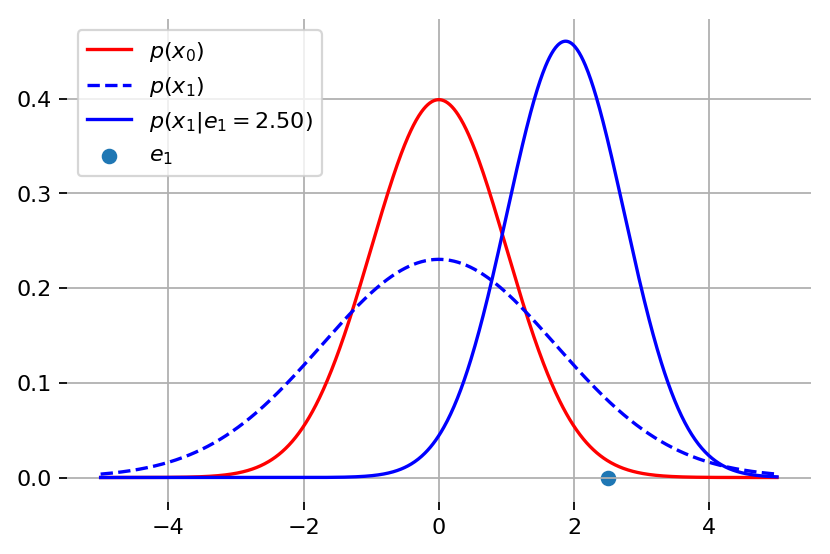

In [7]:
xs = np.linspace(-5, 5, num=1000)
p = norm(loc=mu_0, scale=var_0 ** 0.5)
plt.plot(xs, p.pdf(xs), c="r", label="$p(x_0)$")

p = norm(loc=mu_0, scale=(var_0+var_x) ** 0.5)
plt.plot(xs, p.pdf(xs), "--", c="b", label="$p(x_1)$")

p = norm(loc=mu_1, scale=var_1 ** 0.5)
plt.plot(xs, p.pdf(xs), c="b", label="$p(x_1 | e_1=%.2f)$" % e_1)

plt.scatter([e_1], [0], label="$e_1$")

plt.grid()
plt.legend()
remove_frame()

plt.savefig("walk.png")